<a href="https://colab.research.google.com/github/ArunabhaDeb2018/DeepLearning_CNN/blob/master/TF2_0_TransferLearningVGG16_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


***Transfer Learning-3 with VGG16:- ***Cifar-10 is taken as dataset. Freez all but last Conv blocks .Fine tuning the last conv bloc only.End to end training after freezing the conv layers of vgg16 https://nbviewer.jupyter.org/github/fchollet/deep-learning-with-python-notebooks/blob/master/5.3-using-a-pretrained-convnet.ipynb

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Dense,Flatten,MaxPool2D,Activation,BatchNormalization,Dropout,Input,Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import  VGG16,preprocess_input

In [ ]:
from tensorflow.keras.datasets import cifar10

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
(X_train,y_train),(X_test,y_test)=cifar10.load_data()

170500096/170498071 [==============================] - 6s 0us/step


In [ ]:
X_train_vgg16,X_test_vgg16=preprocess_input(X_train),preprocess_input(X_test);

In [ ]:
K=len(set(y_train[:,0]))#Number of classes

In [ ]:
conv_layers_vgg16=VGG16(weights='imagenet', input_shape=X_train_vgg16[0].shape,include_top=False)#Will not inlcude any FC layers,only CONV blocks

58892288/58889256 [==============================] - 1s 0us/step


In [ ]:
#conv_layers_vgg16.summary()

In [ ]:
#vgg16_whole_net=VGG16()
#vgg16_whole_net.summary()

In [ ]:

# Creating dictionary that maps layer names to the layers
layer_dict = dict([(layer.name, layer) for layer in conv_layers_vgg16.layers])


In [ ]:
# If we want to get rid of 5th conv block we could uncomment this below line
#x = layer_dict['block4_pool'].output
x=conv_layers_vgg16.output #comment this line if above line is uncommented

In [ ]:
x=Flatten()(x)

In [ ]:
x=Dense(512,activation='relu')(x)
x=Dropout(0.5)(x)

In [ ]:
x=Dense(128,activation='relu')(x)
x=Dropout(0.2)(x)

In [ ]:
x=Dense(K,activation='softmax')(x)

In [ ]:
model=Model(inputs=conv_layers_vgg16.input,outputs=x)

In [ ]:
conv_layers_vgg16.trainable = True

set_trainable = False
for layer in conv_layers_vgg16.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [ ]:
print('Number of trainable weights after frezing vgg16 conv layers=',len(model.trainable_weights))

Number of trainable weights after frezing vgg16 conv layers= 12


In [ ]:
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 8, 8, 128)        

In [ ]:
#The reason for using a low learning rate is that we want to limit the magnitude of the modifications we make to the representations of the 3 layers that we are fine-tuning. Updates that are too large may harm these representations.
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])


In [ ]:
model.fit(X_train_vgg16,y_train,epochs=50,batch_size=32,validation_data=(X_test_vgg16,y_test))

Epoch 1/50
1563/1563 [==============================] - 26s 16ms/step - loss: 2.1124 - accuracy: 0.2224 - val_loss: 1.7770 - val_accuracy: 0.3655
Epoch 2/50
1563/1563 [==============================] - 26s 16ms/step - loss: 1.0871 - accuracy: 0.6284 - val_loss: 0.7771 - val_accuracy: 0.7473
Epoch 3/50
1563/1563 [==============================] - 26s 16ms/step - loss: 0.7010 - accuracy: 0.7737 - val_loss: 0.7058 - val_accuracy: 0.7671
Epoch 4/50
1563/1563 [==============================] - 25s 16ms/step - loss: 0.5632 - accuracy: 0.8165 - val_loss: 0.6575 - val_accuracy: 0.7851
Epoch 5/50
1563/1563 [==============================] - 25s 16ms/step - loss: 0.4532 - accuracy: 0.8503 - val_loss: 0.6773 - val_accuracy: 0.7874
Epoch 6/50
1563/1563 [==============================] - 26s 16ms/step - loss: 0.3623 - accuracy: 0.8798 - val_loss: 0.7387 - val_accuracy: 0.7853
Epoch 7/50
1563/1563 [==============================] - 25s 16ms/step - loss: 0.2888 - accuracy: 0.9062 - val_loss: 0.7520 -

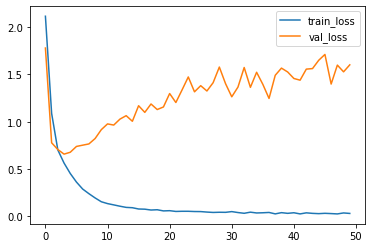

In [ ]:
plt.plot(model.history.history['loss'],label='train_loss')
plt.plot(model.history.history['val_loss'],label='val_loss')
plt.legend()

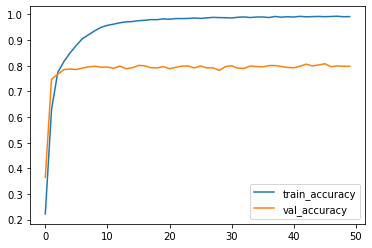

In [ ]:
plt.plot(model.history.history['accuracy'],label='train_accuracy')
plt.plot(model.history.history['val_accuracy'],label='val_accuracy')
plt.legend()

In [ ]:
print(model.summary())

NameError: ignored